# Comparison of DOF between rigid and scheimpflug camera

In [312]:
from __future__ import print_function, division
import numpy as np
import numpy.linalg as linalg
from math import tan, pi, atan, cos, sin, asin
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.misc import imread as imread

# For IPython interactive widgets
from ipywidgets import interact, interactive, FloatSlider 
from IPython.display import display, Image

# Local libraries
import iutils.optics.fourier as fou
import iutils.optics.goptics as gou
import iutils.plot.mplutils as mpu

In [2]:
%matplotlib inline

In [308]:
# Helper functions
tand = lambda angle: tan(pi*angle/180.0)
cosd = lambda angle: cos(pi*angle/180.0)
sind = lambda angle: sin(pi*angle/180.0)
arctand = lambda x : np.rad2deg(np.arctan(x))

def is_even(num):
    return num%2 == 0

def get_points(angleY, xo, ymin=-100, ymax=10, n=10):
    """angleY: angle w.r.t. the y-axis in degrees"""
    y = np.linspace(ymin, ymax, n)
    x = xo + y*tand(angleY)
    return x, y

def get_zo(f, zodash, alpha):
    """alpha: angle w.r.t y axis for scheimpflug camera"""
    return -(zodash*f)/(zodash*cosd(alpha)  - f)

def beta(f, zo, alpha):
    """returns angle of PoSF for scheimpflug camera"""
    return arctand((abs(zo)/f)*sind(alpha))  # why the explicity abs???

# the derivation of the formulae are in onenote (but very similar to the ones in wikipedia)
def geo_depth_of_focus_limits(u, f, c, N):
    """returns depth of focus limits in the image space
    
    @params: u: (float) object plane distance
    @params: f: (float) focal length
    @params: c: (float) circle of confusion
    @params: N: (float) F/# defined at infinite focus
    @returns: vf: (float) far limit of depth of focus
    @returns: vn: (float) near limit of depth of focus 
    
    Note: vn > vf
    """
    vf = (u*f**2)/((f + c*N)*(u-f))
    vn = (u*f**2)/((f - c*N)*(u-f))
    return vf, vn

def geo_depth_of_field_limits(u, f, c, N):
    """returns the depth of field limits in the object space

    @params: u: (float) object plane distance
    @params: f: (float) focal length
    @params: c: (float) circle of confusion
    @params: N: (float) F/# defined at infinite focus
    @returns: df: (float) far limit of depth of field
    @returns: dn: (float) near limit of depth of field
    
    Note: df > dn
    """
    df = (u*f**2)/(f**2 - c*N*(u - f))
    dn = (u*f**2)/(f**2 + c*N*(u - f))
    return df, dn

In [401]:
# Optical system (for both rigid and scheimpflug camera)

# parameters
#distances 800, 1000, 1200 # data for simulation @ paper
#delta_z 0.2517254         # data for simulation @ paper 

zodash = 31.57894736842105 #30    # Lens to image plane distance
f = 15         # Focal length
fnum = 2.5     # Aperture
pixel_size = 0.00178  # pixel size (used as Circle of confusion for DOF)
coc = 1/30

# for perfect imaging at u = 1000 
print(gou.gaussian_lens_formula(u=1000, v=None, f=f))

# imaging specified by image plane distance for the plots
print(gou.gaussian_lens_formula(u=None, v=zodash, f=f))

# imaging specified by image plane distance for the plots
print(gou.gaussian_lens_formula(u=100, v=None, f=f))

glfParams(u=1000, v=15.228426395939087, f=15)
glfParams(u=28.571428571428573, v=31.57894736842105, f=15)
glfParams(u=100, v=17.647058823529413, f=15)


## DOF map for Scheimpflug camera

uo = 200.0


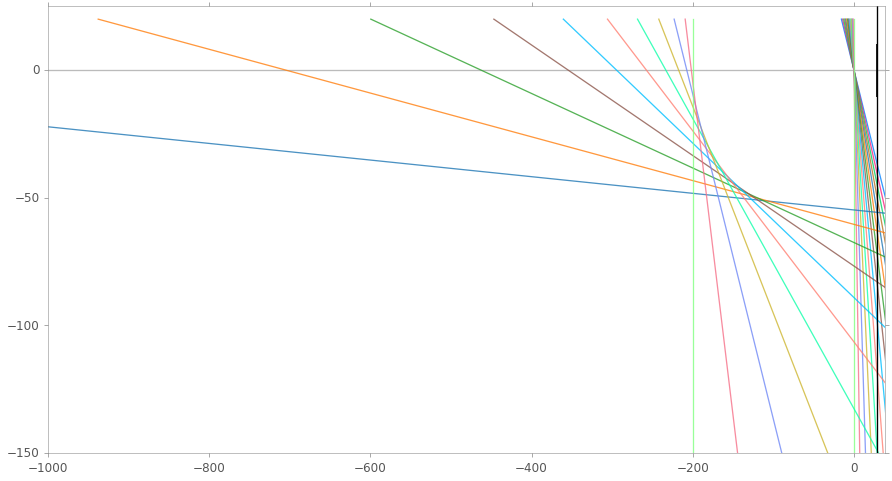

In [374]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
cols = ['#0080FF', '#F52080', '#00CC60', '#B96F20', '#1f77b4', 
        '#ff7f0e', '#2ca02c', '#8c564b', '#00BFFF', '#FF8073',
        '#11FFAA', '#CEb631', '#7088F6', '#f67088', '#80FF80', 
        '#EAC910', '#38A7D0', '#f34060', '#40d370', '#CE8f31', 
        '#2166AC', '#B2182B', '#32b135', '#814D16', '#606060',
        '#0080FF', '#F52080', '#00CC60', '#B96F20', '#1f77b4', 
        '#ff7f0e', '#2ca02c', '#8c564b', '#00BFFF', '#FF8073',
        '#11FFAA', '#CEb631', '#7088F6', '#f67088', '#80FF80', 
        '#EAC910', '#38A7D0', '#f34060', '#40d370', '#CE8f31', 
        '#2166AC', '#B2182B', '#32b135', '#814D16', '#606060']

ymin, ymax = -150, 25
#ymin, ymax = -150, 150
uo = gou.gaussian_lens_formula(u=None, v=zodash, f=f).u
print('uo =', uo)
ax.set_xlim(-1000, zodash + 10)
ax.set_ylim(ymin, ymax)
ax.axhline(color='#BBBBBB',)

# Draw image plane
ax.axvline(x=zodash, ymin=ymin, ymax=ymax, color='#CCCCCC')
x, y = get_points(0, zodash, -10, 10)
ax.plot(x, y, color='#222222', lw=2,)

# Draw lens plane
alpha = np.linspace(-38, 0, 15)
for i, each in enumerate(alpha):
    x, y = get_points(each, 0, ymin, ymax-5)
    ax.plot(x, y, color=cols[i], alpha=0.8)
# Draw object plane
for i, each in enumerate(alpha):
    zo = get_zo(f, zodash, each)
    angleY = beta(f, zo, each)
    x, y = get_points(angleY, zo, ymin, ymax-5)
    ax.plot(x, y, color=cols[i], alpha=0.8)
ax.axvline(color='#000000', x=zodash)
plt.show()

-24.0
-21.3333333333
-18.6666666667
-16.0
-13.3333333333
-10.6666666667
-8.0
-5.33333333333
-2.66666666667
0.0


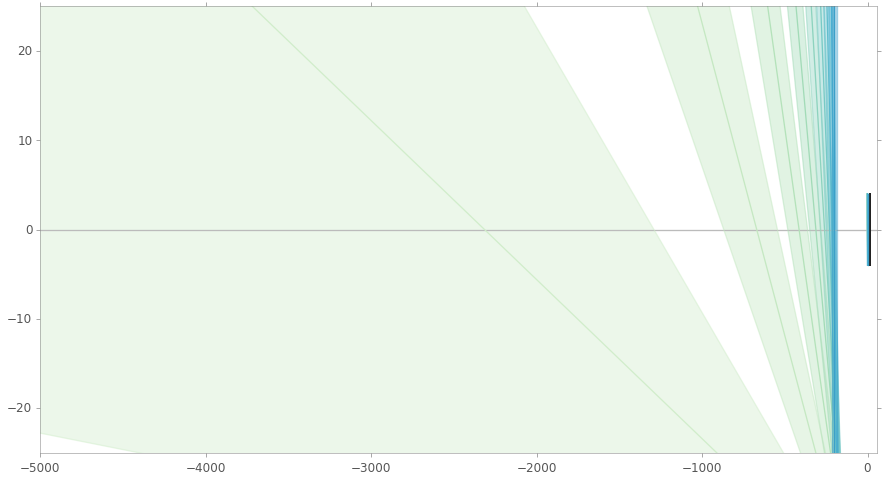

In [420]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
num = 10

#ccmap = plt.cm.plasma
#cindex = np.linspace(0, ccmap.N-40, num)
ccmap = plt.cm.GnBu
cindex = np.linspace(40, ccmap.N-80, num)
cols = [ccmap(int(i)) for i in cindex]

ymin, ymax = -25, 25
uo = 200
zodash = gou.gaussian_lens_formula(u=uo, v=None, f=f).v
zodash_far, zodash_near = geo_depth_of_focus_limits(u=uo, f=f, c=coc, N=fnum)
#print('zodash = ', zodash,  'vf = ', vf, 'vn =', vn)

ax.set_xlim(-5000, 60)
ax.set_ylim(ymin, ymax)
ax.axhline(color='#BBBBBB',)

# Draw image plane
x, y = get_points(0, zodash, -4, 4)
ax.plot(x, y, color='#222222', lw=2,)

# Draw lens plane
alpha = np.linspace(-24, 0, num)
for i, each in enumerate(alpha):
    x, y = get_points(each, 0, -4, 4)
    ax.plot(x, y, color=cols[i], alpha=1.0)
    
# Draw object plane
ypad = 100 # the pad is needed to ensure that the regions within the visible
          # canvas are appropriately filled
for i, each in enumerate(alpha):
    print(each)
    zo = get_zo(f, zodash, each)
    angleY = beta(f, zo, each)
    x, y = get_points(angleY, zo, ymin-ypad, ymax+ypad)
    ax.plot(x, y, color=cols[i], alpha=1.0)
    # Draw DOF wedge
    # near
    zo_near = get_zo(f, zodash_near, each)
    angleY_near = beta(f, zo_near, each)
    xn, yn = get_points(angleY_near, zo_near, ymin-ypad, ymax+ypad)
    ax.plot(xn, yn, color=cols[i], alpha=0.5)
    # far
    zo_far = get_zo(f, zodash_far, each)
    angleY_far = beta(f, zo_far, each)
    xf, yf = get_points(angleY_far, zo_far, ymin-ypad, ymax+ypad)
    ax.plot(xf, yf, color=cols[i], alpha=0.5)
    
    if each: # currently the following block of code assumes that the alpha is -ve
        # fill the region between far and near 
        posf_near = interp1d(xn, yn)
        posf_far = interp1d(xf, yf)
        x_fill_start = min(xn[0], xf[0])
        x_fill_end = max(xn[-1], xf[-1]) 
        x_fill = np.linspace(x_fill_start, x_fill_end, 10)
        y_fill_near = posf_near(x_fill)
        y_fill_far = posf_far(x_fill)
        ax.fill_between(x=x_fill, y1=y_fill_near, y2=y_fill_far, facecolor=cols[i], edgecolor='none', alpha=0.4)
    else:
        ax.fill_between(x=[xf[0], xn[0]], y1=ymin, y2=ymax, facecolor=cols[i], edgecolor='none', alpha=0.4)

plt.show()

## DOF map for Rigid camera

The DOF calculations are based on geometric DOF expressions derived using similar triangle geometry. It doesn't take diffraction into account. The CoC (circle of confusion) is equal to the pixel size.

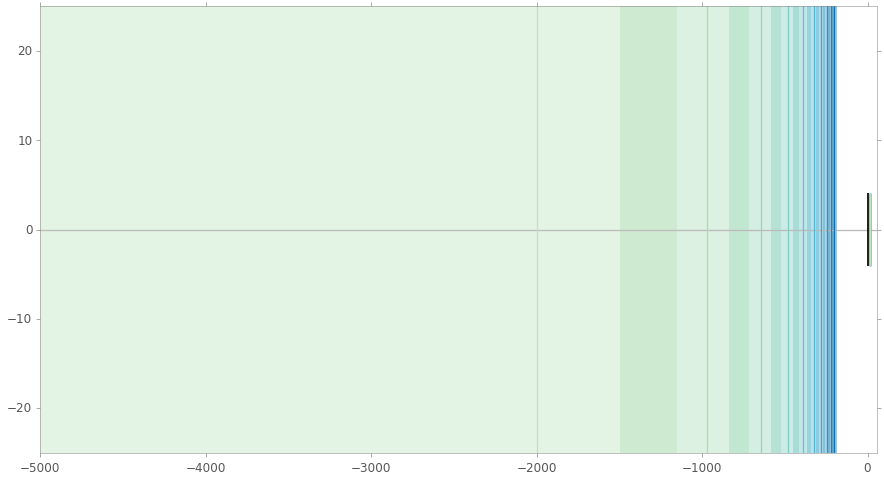

In [417]:
u_start = 200
u_end = 2000
v_start = gou.gaussian_lens_formula(u=u_start, v=None, f=f).v
v_end = gou.gaussian_lens_formula(u=u_end, v=None, f=f).v

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ymin, ymax = -25, 25
ax.set_xlim(-5000, 60)
ax.set_ylim(ymin, ymax)
ax.axhline(color='#BBBBBB',)

num = 10

#ccmap = plt.cm.plasma
#cindex = np.linspace(0, ccmap.N-40, num)
ccmap = plt.cm.GnBu_r
cindex = np.linspace(40, ccmap.N-80, num)
cols = [ccmap(int(i)) for i in cindex]

# draw lens plane
x, y = get_points(0, 0, -4, 4)
ax.plot(x, y, color='#222222', lw=2,)

for i, v in enumerate(np.linspace(v_start, v_end, num)):
    u = gou.gaussian_lens_formula(u=None, v=v, f=f).u
    df, dn = geo_depth_of_field_limits(u, f, coc, fnum)
    # Draw image plane
    x, y = get_points(angleY=0, xo=v, ymin=-4, ymax=4)
    ax.plot(x, y, color=cols[i], alpha=1)
    # Draw the object plane
    x, y = get_points(angleY=0, xo=-u, ymin=ymin, ymax=ymax)
    ax.plot(x, y, color=cols[i], alpha=1) 
    # Draw DOF region
    # far
    xf, yf = get_points(angleY=0, xo=-df, ymin=ymin, ymax=ymax)
    # near
    xn, yn = get_points(angleY=0, xo=-dn, ymin=ymin, ymax=ymax)   
    # fill
    ax.fill_between(x=[xf[0], xn[0]], y1=ymin, y2=ymax, facecolor=cols[i], edgecolor='none', alpha=0.4)
    
    
plt.show()